# PA KELOMPOK 3 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

## Table Of Contents

1. [Tujuan Dibuatnya Program](#1.-Tujuan-Dibuatnya-Program)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
3. [Directory List](#3.-Directory-List)
2. [Visualisasi](#4.-Visualisasi)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
2. [Library yang digunakan](#2.-Library-yang-digunakan)


# 1. Tujuan Dibuatnya Program

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) guna mengklasifikasikan dan memprediksi gambar anime, kartun atau manusia.

2. Untuk mengklasifikasikan suatu gambar ke salah satu dari 3 kategori : 
    **Anime, Cartoon, Human**
    
3. Jumlah data training yang digunakan sebesar 6856 sampel, jumlah data testing sebesar 1957 sampel serta jumlah data validation sebesar 2937 sampel.

# 2. Library yang digunakan

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# 3. Directory List

In [46]:
# directory list
main_path = './Data/'

In [47]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30, 
                                    shear_range=0.2, 
                                    zoom_range=(0.5,1.0), 
                                    fill_mode='nearest', 
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split = 0.3)

train_set = train_datagen.flow_from_directory(main_path,
                                                subset = 'training',
                                                shuffle = True,
                                                seed = 123,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.3)

val_set = val_datagen.flow_from_directory(main_path,
                                            batch_size=32,
                                            shuffle = True,
                                            seed = 123,                                            
                                            subset = 'validation',
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split = 0.2)

test_set = test_datagen.flow_from_directory(main_path,
                                                subset = 'validation',
                                                shuffle = True,
                                                seed = 123,                                                
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 6243 images belonging to 3 classes.
Found 2674 images belonging to 3 classes.
Found 1782 images belonging to 3 classes.


In [34]:
# class names
class_names = ['Anime', 'Cartoon', 'Human']
class_names

['Anime', 'Cartoon', 'Human']

# 4. Visualisasi

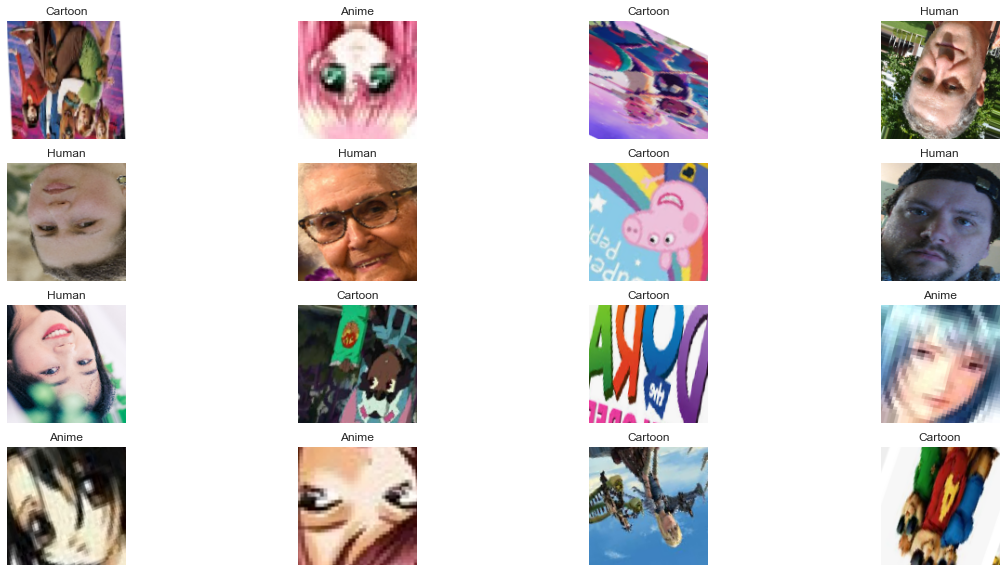

In [35]:
# data visualization
plt.figure(figsize=(20, 10))
images, labels = train_set.next()

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

plt.show()

# Meta Data

In [48]:
data_train = []
data_test = []
data_val = []

for i in range(len(train_set)) :
    x,y = train_set.next()
    for j in range(len(y)) :
        data_train.append(class_names[tf.argmax(y[j])])

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        data_test.append(class_names[tf.argmax(y[j])])
        
for i in range(len(val_set)) :
    x,y = val_set.next()
    for j in range(len(y)) :
        data_val.append(class_names[tf.argmax(y[j])])

banyak_data = len(data_train) + len(data_test) + len(data_val)

print("Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset")
print("Ukuran Gambar     : [128, 128, 3]")
print("Kelas             :",class_names)
print("Banyak Data       :",banyak_data)
print("Banyak Data Train :",len(data_train))
print("Banyak Data Test  :",len(data_test))
print("Banyak Data val   :",len(data_val))

Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset
Ukuran Gambar     : [128, 128, 3]
Kelas             : ['Anime', 'Cartoon', 'Human']
Banyak Data       : 10699
Banyak Data Train : 6243
Banyak Data Test  : 1782
Banyak Data val   : 2674


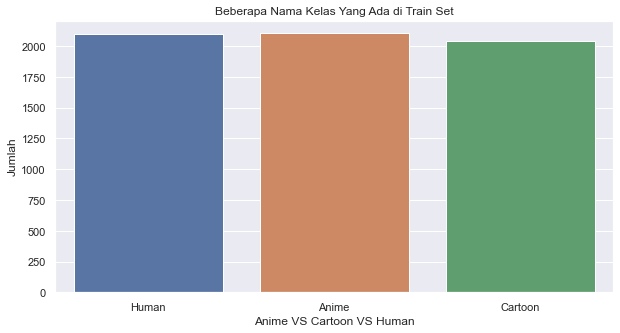

In [49]:
plt.figure(figsize=(10, 5))

sns.set_theme()

sns.countplot(x=data_train)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

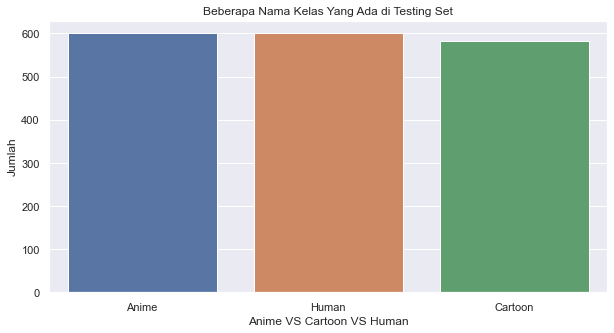

In [50]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_test)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Testing Set')
plt.show()

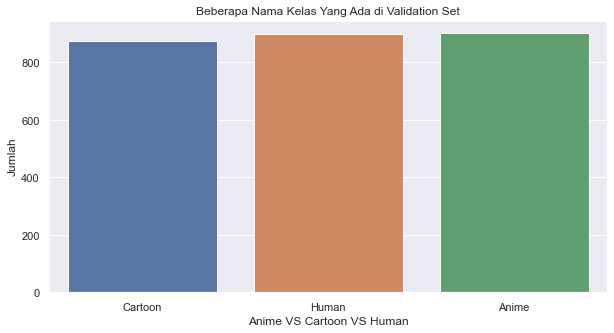

In [51]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_val)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Validation Set')
plt.show()

In [54]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 16)       

In [56]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [57]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

In [58]:
hasil = model.fit(train_set, epochs=10, validation_data=val_set, verbose=1, callbacks=[earlyStopping])

Epoch 1/10
196/196 [==============================] - 242s 1s/step - loss: 0.4567 - accuracy: 0.8105 - val_loss: 0.2843 - val_accuracy: 0.9203
Epoch 2/10
196/196 [==============================] - 228s 1s/step - loss: 0.2327 - accuracy: 0.9178 - val_loss: 0.2529 - val_accuracy: 0.9132
Epoch 3/10
196/196 [==============================] - 226s 1s/step - loss: 0.1944 - accuracy: 0.9329 - val_loss: 0.2543 - val_accuracy: 0.9106
Epoch 4/10
196/196 [==============================] - 226s 1s/step - loss: 0.1670 - accuracy: 0.9409 - val_loss: 0.1473 - val_accuracy: 0.9510
Epoch 5/10
196/196 [==============================] - 234s 1s/step - loss: 0.1548 - accuracy: 0.9476 - val_loss: 0.1403 - val_accuracy: 0.9577
Epoch 6/10
196/196 [==============================] - 267s 1s/step - loss: 0.1391 - accuracy: 0.9513 - val_loss: 0.2238 - val_accuracy: 0.9177
Epoch 7/10
196/196 [==============================] - 232s 1s/step - loss: 0.1275 - accuracy: 0.9558 - val_loss: 0.1243 - val_accuracy: 0.9600

In [88]:
val_evaluate = model.evaluate(val_set, verbose=0)
print(f'Val loss     : {val_evaluate[0] * 100} %')
print(f'Val accuracy : {val_evaluate[1] * 100} %')

Val loss     : 17.130546271800995 %
Val accuracy : 94.42782402038574 %


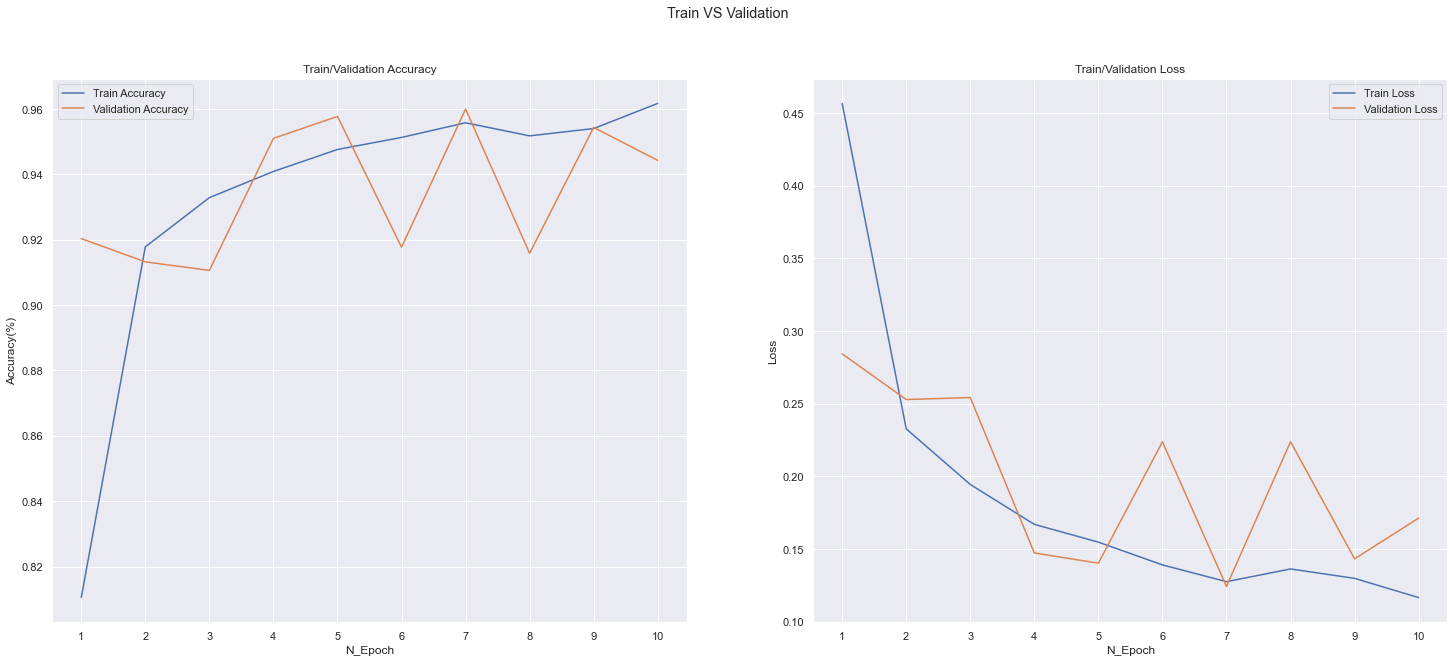

In [60]:
epoch = [i+1 for i in range(10)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

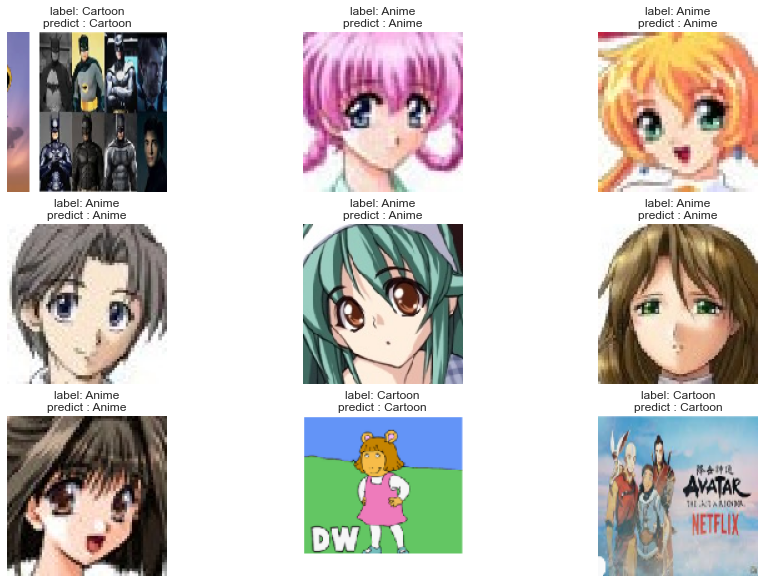

In [61]:
image ,label = next(iter(test_set))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

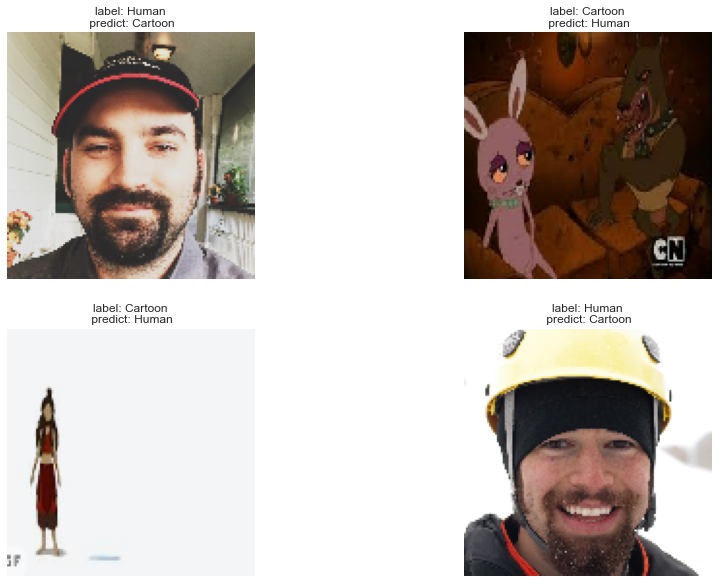

In [85]:
#Plot prediction Error
image ,label = next(iter(test_set))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,2,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}\n predict: {class_names[y_pred]}')
        j+=1
    i+=1

In [74]:
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

print("Banyak data yang di tes      : ",len(y_test))
print("Banyak data yang di prediksi : ",len(y_pred)) 

Banyak data yang di tes      :  1782
Banyak data yang di prediksi :  1782


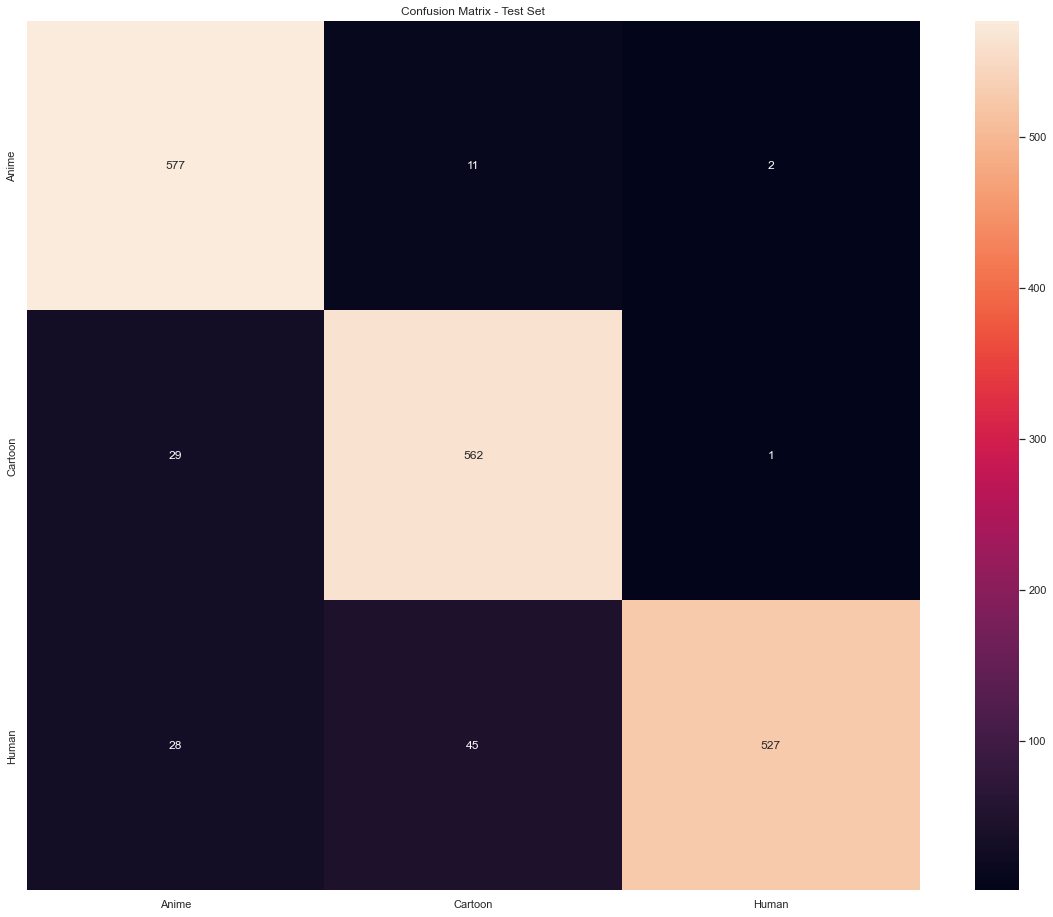

In [75]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [76]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Anime       0.91      0.98      0.94       590
     Cartoon       0.91      0.95      0.93       592
       Human       0.99      0.88      0.93       600

    accuracy                           0.93      1782
   macro avg       0.94      0.94      0.93      1782
weighted avg       0.94      0.93      0.93      1782

